In [92]:
import sys
sys.path.append('..')
from src.analysis.model_performances import *
from src.common import *
from helpers import *


answer_type = TRUE_FALSE_ANSWER_TYPE #FREE_ANSWER#
score_key = F1_SCORE_KEY#'accuracy'
answer_type_ext = tf_answer_type(score_key = F1_SCORE_KEY)
stats_all = collect_stats_all(tf_answer_type(score_key = F1_SCORE_KEY))

100%|██████████| 25920/25920 [00:01<00:00, 14336.63it/s]


In [116]:
save_dir = os.path.join(STATISTICS_PATH, 'by_categories_plots')
os.makedirs(save_dir, exist_ok=True)
plan_length = 1
model_name = 'gemini'#'gemma-2b-it'
prompt_type = 'few_shot_1'
categories = QUESTION_CATEGORIES
subs = WITHOUT_RANDOM_SUB

# By Domain

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

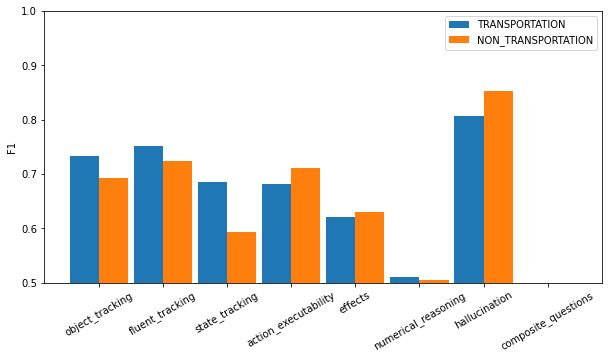

In [118]:
ramifications = WITHOUT_RAMIFICATIONS

data_all = []
for domain in [TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAIN_KEY]:
    plt.figure()
    data = {NAME_KEY: domain, DATA_KEY: []}
    for question_category in categories:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
            data[DATA_KEY].append(res)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0.5,1])
save_path = os.path.join(save_dir, f'by_domain.{model_name}.{prompt_type}.{subs}.{ramifications}.pl-{plan_length}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')


# By Ramifications

by ramifications.gemini.few shot 1.without random sub.ALL DOMAINS.pl-1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

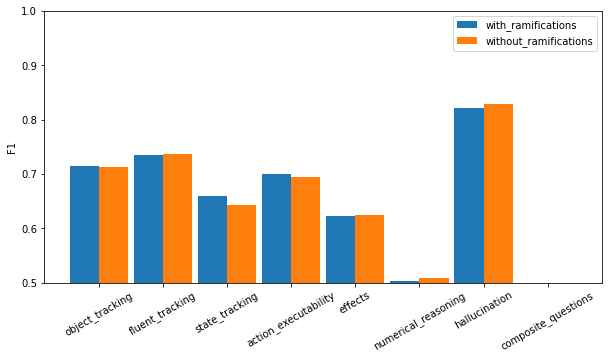

In [119]:
domain = ALL_DOMAINS_KEY

data_all = []
for ramifications in RAMIFICATION_TYPES:
    plt.figure()
    data = {NAME_KEY: ramifications, DATA_KEY: []}
    for question_category in categories:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
            data[DATA_KEY].append(res)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0.5,1])

save_name = f'by_ramifications.{model_name}.{prompt_type}.{subs}.{domain}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('_', ' '))

# By Subs

by subs.gemini.few shot 1.ALL DOMAINS.with ramifications.pl-1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

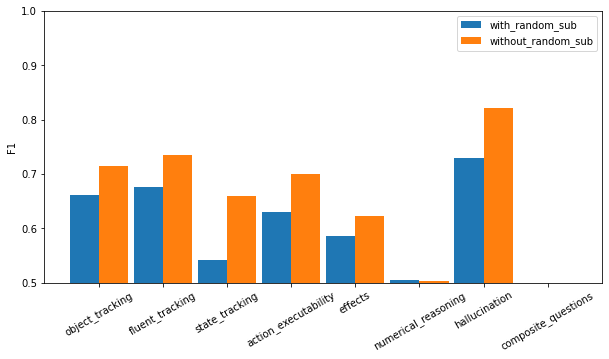

In [121]:
domain = ALL_DOMAINS_KEY
ramifications = WITH_RAMIFICATIONS

data_all = []
for subs in SUBSTITUTION_TYPES:
    plt.figure()
    data = {NAME_KEY: subs, DATA_KEY: []}
    for question_category in categories:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
            data[DATA_KEY].append(res)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0.5,1])

save_name = f'by_subs.{model_name}.{prompt_type}.{domain}.{ramifications}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('_', ' '))